# Chapter 6 : using a neural network to fit the data
### 2. The third-hardest problem in physics is finding a proper wine to celebrate discoveries. Load the wine data from chapter 4, and create a new model with the appropriate number of input parameters.
* How long does it take to train compared to the temperature data we have been using?
* Can you explain what factors contribute to the training times?
* Can you get the loss to decrease while training on this dataset?
* How would you go about graphing this dataset?

Here we take a step back to the wine data file from chapter 4. Let's load it. \
Note : this work could be done with Numpy library.

In [3]:
import pandas as pd
path = r'data/winequality-white.csv'
wine_data = pd.read_csv(path, sep=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_data.shape

(4898, 12)

Let's see how each feature is distributed

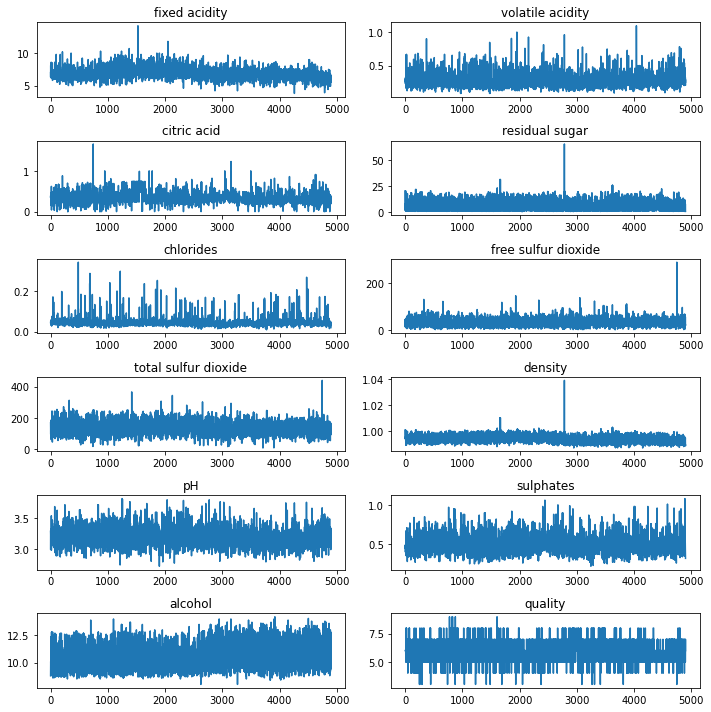

In [5]:
import matplotlib.pyplot as plt

def plot_figure(index,column):
    plt.subplot(6,2,index)
    plt.title(column)
    plt.plot(wine_data[column])
    
plt.figure(figsize=(10,10))

for index, column in enumerate(wine_data.columns):
    if index+1<=len(wine_data.columns):
        plot_figure(index+1, column)

plt.tight_layout()

In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


There are no missing values, it's a good start. \
Usually, I would start by getting rid of the outsiders that we can easily identify in the `fixed acidity`, `residual sugar`, `free sulfur dioxide` and `density` features. Here I won't do any further data cleaning since this exercise seems to be just another overview of the `nn.Sequential`module.

We now define our features and target :

In [7]:
columns = wine_data.columns
target = wine_data[columns[-1]]
features = wine_data[columns[:-1]]

We can talk a little about those data : \
First, the target is discrete, so it's a *classification problem*. \
Second, there is no ordinal classes : every feature is characterized by a floating number.

At this stage of the book, we haven't seen classification problem in deep learning yet. So we'll treat this problem as a regression problem.

In [8]:
print(f"Size of features : {features.shape} ")
print(f"Target's values : {target.unique()}")

Size of features : (4898, 11) 
Target's values : [6 5 7 8 4 3 9]


In [9]:
import torch
features_t = torch.tensor(features.values, dtype=torch.float32)
target_t = torch.tensor(target.values, dtype=torch.float32).unsqueeze(1) # Adding an extra dimension for nn.Sequential module

In [10]:
### Setting training/validation data
n_samples = features_t.shape[0] 
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val] 
val_indices = shuffled_indices[-n_val:]

train_features = features_t[train_indices]
train_target = target_t[train_indices]
val_features = features_t[val_indices]
val_target = target_t[val_indices]

This time, there are 11 inputs for 1 output. \
Note : we'll use the former training loop function saw on ex1.

In [11]:
from collections import OrderedDict
import torch.nn as nn
import torch.optim as optim

def training_loop(n_epochs, optimizer, model, loss_fn,
                  train_input, val_input, train_output, val_output):
    for epoch in range(1, n_epochs + 1):
        train_prediction = model(train_input)
        loss_train = loss_fn(train_prediction, train_output)
        
        val_prediction = model(val_input)
        loss_val = loss_fn(val_prediction, val_output)
        
        optimizer.zero_grad() 
        loss_train.backward() 
        optimizer.step()
        
        if epoch == 1 or epoch == 2 or epoch == 3 or epoch % 50 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
            f" Validation loss {loss_val.item():.4f}")

In [12]:
seq_model_ex2 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(11,4)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(4,1))]))

In [13]:
optimizer = optim.SGD(seq_model_ex2.parameters(), lr=1e-3)

training_loop(
    n_epochs = 500,
    optimizer = optimizer, 
    model = seq_model_ex2, 
    loss_fn = nn.MSELoss(), 
    train_input = train_features, 
    val_input = val_features, 
    train_output = train_target, 
    val_output = val_target)

Epoch 1, Training loss 38.5193, Validation loss 38.0782
Epoch 2, Training loss 36.9575, Validation loss 36.4582
Epoch 3, Training loss 32.7733, Validation loss 32.4003
Epoch 50, Training loss 13.1548, Validation loss 12.8794
Epoch 100, Training loss 5.3196, Validation loss 5.1388
Epoch 150, Training loss 2.4481, Validation loss 2.3266
Epoch 200, Training loss 1.3963, Validation loss 1.3110
Epoch 250, Training loss 1.0110, Validation loss 0.9477
Epoch 300, Training loss 0.8698, Validation loss 0.8199
Epoch 350, Training loss 0.8180, Validation loss 0.7763
Epoch 400, Training loss 0.7989, Validation loss 0.7622
Epoch 450, Training loss 0.7918, Validation loss 0.7583
Epoch 500, Training loss 0.7887, Validation loss 0.7575


Now that our model has been trained, let's check some of its predictions...

In [21]:
import random
target_series = pd.Series(val_target.squeeze(1).numpy())
rd_index_rate8 = random.choice(target_series[target_series == 8].index)
rd_index_rate5 = random.choice(target_series[target_series == 5].index)
rd_index_rate3 = random.choice(target_series[target_series == 3].index)

# The prediciton should return a wine quality close to 8 
print(f"The wine quality is 8, and the model prediction is : {seq_model_ex2(features_t[rd_index_rate8]).item():.3f}")

# The prediciton should return a wine quality close to 5 
print(f"The wine quality is 5, and the model prediction is : {seq_model_ex2(features_t[rd_index_rate5]).item():.3f}")

# The prediciton should return a wine quality close to 3
print(f"The wine quality is 3, and the model prediction is : {seq_model_ex2(features_t[rd_index_rate3]).item():.3f}")

The wine quality is 8, and the model prediction is : 5.850
The wine quality is 5, and the model prediction is : 5.850
The wine quality is 3, and the model prediction is : 5.850


Well... It's kind of surprising... Our model doesn't make good predictions at all. Even for a wine quality of 5, we can't assume this is a close score since it predicts the same value for qualities 8 and 3.

Let's sum up what we have done here : 
- We took a tabular data and assume it was a regression problem
- We selected the wine quality as the target, which includes discrete values
- We selected an `SGD` optimizer without any `momentum`
- We constructed a sequential model with one hidden layer and selected `nn.Tanh()` as activation function
- Since we choose to deal with a regression problem, we selected `nn.MSELoss()` as a loss function
- We trained our model on training data through 500 epochs and it seemed converge to low numbers of training loss and validation loss.

With that in mind, we expect that the main problem is that we have considered a regression problem instead of a classification one. Indeed, by selecting the `nn.MSELoss()` as a loss function, we tell our model to measure the mean squared error between each element so it won't give a meaningful output regarding the quality rates. That choice with our model's architecture lead to converge to a unique number which is not what we are looking for.